# Logistic Regression

Logistic regression is a statistical model used in machine learning, medical fields, social sciences, and other areas to predict the probability of a certain class or event taking place based on one or more independent variables. It models the log-odds of an event as a linear combination of the independent variables, and the corresponding probability is obtained using the logistic function. The parameters of a logistic regression model are typically estimated using maximum-likelihood estimation. This model is widely used in various applications, such as predicting the risk of developing a disease, customer propensity to purchase a product, likelihood of a person ending up in the labor force, and predicting the likelihood of a homeowner defaulting on a mortgage. It is also used in disaster management to predict decision-making in evacuations.

Logistic Regression can be used for:-

1. Binery Classification
2. Multi-class Classification
3. One-vs-Rest Classification

## Assumtions of Logistic Regression

1. The dependent variable must be categorical in nature.
2. The indipendent variable(features) must be indipendent.
3. There should be no outliers in the data. check for outliers.
4. There should be no high correlations among the indipendent varables.This can be checked using a correlation matrix.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [3]:
# data import
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# preprocess the data

# remove the deck colomn
df.drop('deck',axis=1, inplace=True)


In [6]:
# impute the missing values in age and fare
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)

In [7]:
# impute missing values in embarked town and embarked 
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [8]:
# encode the categorical variable using for loop where object and category data type is given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
        

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [10]:
# X and y column
X = df.drop('survived',axis=1)
y = df['survived']

In [11]:
# train test split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [12]:
# model call 
model = LogisticRegression()

In [13]:
# model Call
model.fit(X_train,y_train)

c:\Users\Vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# predict the values
y_pred = model.predict(X_test)


In [ ]:
# evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))
print('confusion_matrix',confusion_matrix(y_test, y_pred))
print('classification_report', classification_report(y_test, y_pred))

accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0
f1_score 1.0
confusion_matrix [[110   0]
 [  0  69]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Truth')

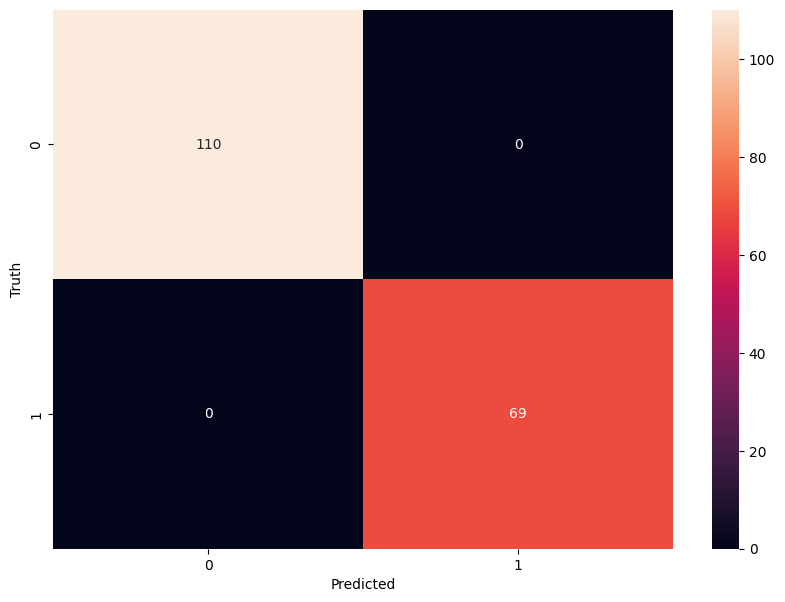

In [ ]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# save the model
import pickle
pickle.dump(model,open('./saved_models/02_model_logistic_regression.pkl','wb'))